In [54]:
#import some necessary libraries
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import warnings
from subprocess import check_output
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from scipy.special import boxcox1p
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet

color = sns.color_palette()
sns.set_style('darkgrid')

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
print(check_output(["cmd", "input"]).decode("utf8")) #check the files available in the directory

Microsoft Windows [Version 10.0.17134.648]
(c) 2018 Microsoft Corporation. All rights reserved.

(base) C:\Users\Rizdi\IYKRA Data Science Fellowship>


In [55]:
import plotly
plotly.tools.set_credentials_file(username='Rizdi21', api_key='QwNEljtKz2xcQkl1aY2I')

import plotly.plotly as py
from plotly.grid_objs import Grid, Column
from plotly.tools import FigureFactory as ff
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [56]:
# Loading Train and Test Datasets
weather = pd.read_csv('weather.csv')
industry_volume = pd.read_csv('industry_volume.csv')
price_sales_promotion = pd.read_csv('price_sales_promotion.csv')
industry_soda_sales = pd.read_csv('industry_soda_sales.csv')
historical_volume = pd.read_csv('historical_volume.csv')
event_calendar = pd.read_csv('event_calendar.csv')
demographics = pd.read_csv('demographics.csv')
volume_forecast = pd.read_csv('volume_forecast.csv')
sku_recommendation = pd.read_csv('sku_recommendation.csv')

In [57]:
# Merging all train datasets

try1 = pd.merge(pd.merge(pd.merge(industry_soda_sales, price_sales_promotion, how='inner'),weather ,how='inner'), industry_volume ,how='inner')
try2 = pd.merge(pd.merge(historical_volume,event_calendar, how = 'inner'), demographics, how = 'inner')
try3 = pd.merge(try1,try2, how='inner')

try3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 0 to 20999
Data columns (total 24 columns):
YearMonth                           21000 non-null int64
Soda_Volume                         21000 non-null int64
Agency                              21000 non-null object
SKU                                 21000 non-null object
Price                               21000 non-null float64
Sales                               21000 non-null float64
Promotions                          21000 non-null float64
Avg_Max_Temp                        21000 non-null float64
Industry_Volume                     21000 non-null int64
Volume                              21000 non-null float64
Easter Day                          21000 non-null int64
Good Friday                         21000 non-null int64
New Year                            21000 non-null int64
Christmas                           21000 non-null int64
Labor Day                           21000 non-null int64
Independence Day        

In [58]:
# Converting into datetime column on try3['YearMonth']
try3['YearMonth'] = pd.to_datetime(try3['YearMonth'] , format = '%Y%m')


In [59]:
try3 = try3.set_index('YearMonth')
try3.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01'],
              dtype='datetime64[ns]', name='YearMonth', length=21000, freq=None)

In [60]:
# Agency 02

SKU01 = try3.loc[(try3['Agency'] == 'Agency_02') & (try3['SKU'] == 'SKU_01')]
SKU02 = try3.loc[(try3['Agency'] == 'Agency_02') & (try3['SKU'] == 'SKU_02')]
SKU03 = try3.loc[(try3['Agency'] == 'Agency_02') & (try3['SKU'] == 'SKU_03')]
SKU01.shape, SKU02.shape, SKU03.shape

((60, 23), (60, 23), (60, 23))

In [61]:
SKU01.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2013-01-01 to 2017-12-01
Data columns (total 23 columns):
Soda_Volume                         60 non-null int64
Agency                              60 non-null object
SKU                                 60 non-null object
Price                               60 non-null float64
Sales                               60 non-null float64
Promotions                          60 non-null float64
Avg_Max_Temp                        60 non-null float64
Industry_Volume                     60 non-null int64
Volume                              60 non-null float64
Easter Day                          60 non-null int64
Good Friday                         60 non-null int64
New Year                            60 non-null int64
Christmas                           60 non-null int64
Labor Day                           60 non-null int64
Independence Day                    60 non-null int64
Revolution Day Memorial             60 non-null int64
R

In [62]:
A = SKU01['Volume'].resample('MS').mean()

In [63]:
A['2013':]

YearMonth
2013-01-01    6512.940
2013-02-01    7408.476
2013-03-01    8948.235
2013-04-01    8987.115
2013-05-01    9450.105
2013-06-01    8395.702
2013-07-01    7565.295
2013-08-01    7035.552
2013-09-01    5978.988
2013-10-01    6091.200
2013-11-01    4950.612
2013-12-01    7067.952
2014-01-01    5302.368
2014-02-01    7758.075
2014-03-01    9818.820
2014-04-01   10022.505
2014-05-01    8001.180
2014-06-01    9008.715
2014-07-01   10330.095
2014-08-01   10438.958
2014-09-01    9533.055
2014-10-01   11093.328
2014-11-01    6267.348
2014-12-01    8533.515
2015-01-01    6082.992
2015-02-01    6921.504
2015-03-01    5901.876
2015-04-01    8570.017
2015-05-01   10125.862
2015-06-01    9884.483
2015-07-01    8723.700
2015-08-01    8943.375
2015-09-01    9184.755
2015-10-01    7905.600
2015-11-01    6815.772
2015-12-01    7391.628
2016-01-01    5235.732
2016-02-01    5607.036
2016-03-01    5515.668
2016-04-01    5382.288
2016-05-01    6767.820
2016-06-01    5948.964
2016-07-01    8083.477
2

# Visualizing SKU01 Volume Time Series Data

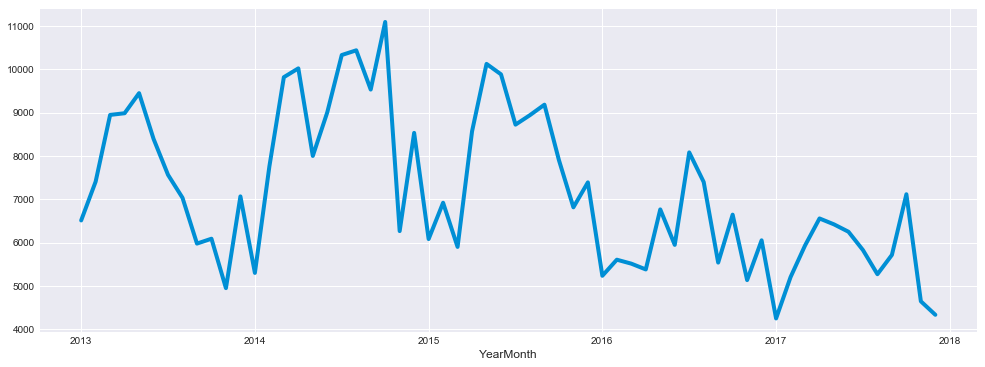

In [64]:
A.plot(figsize=(15, 6))
plt.show()

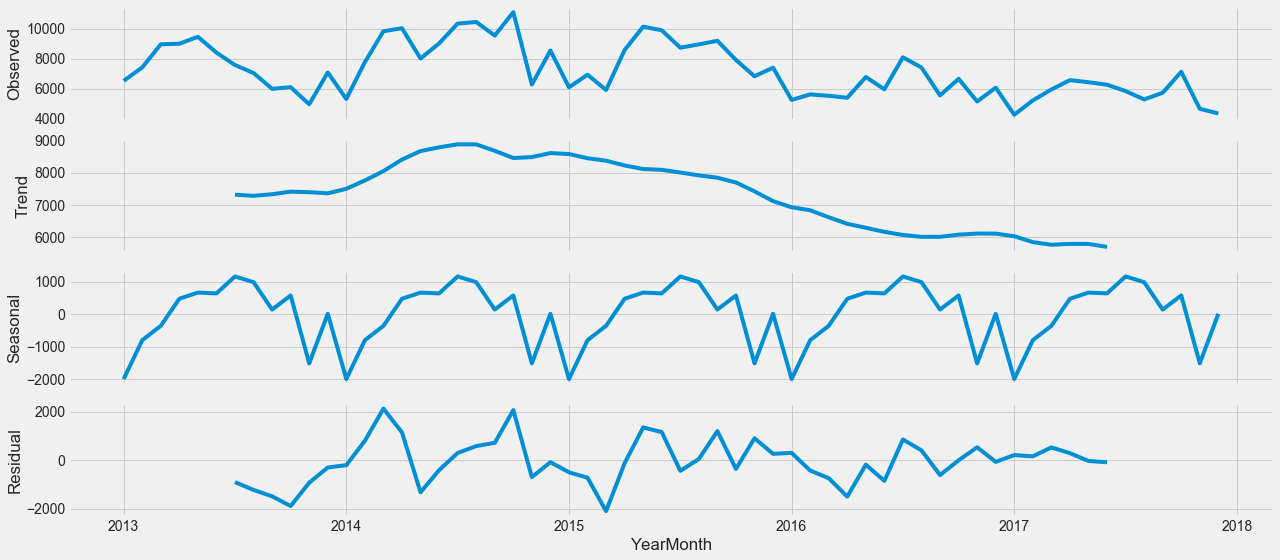

In [65]:
from pylab import rcParams
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(A, model='additive')
fig = decomposition.plot()
plt.show()

# Forecasting With ARIMA

In [66]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [67]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_try,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [68]:
mod = sm.tsa.statespace.SARIMAX(A,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5431      0.363      1.495      0.135      -0.169       1.255
ma.L1         -0.7966      0.243     -3.272      0.001      -1.274      -0.319
ar.S.L12      -0.5755      0.136     -4.222      0.000      -0.843      -0.308
sigma2      1.686e+06   6.78e+05      2.488      0.013    3.58e+05    3.01e+06


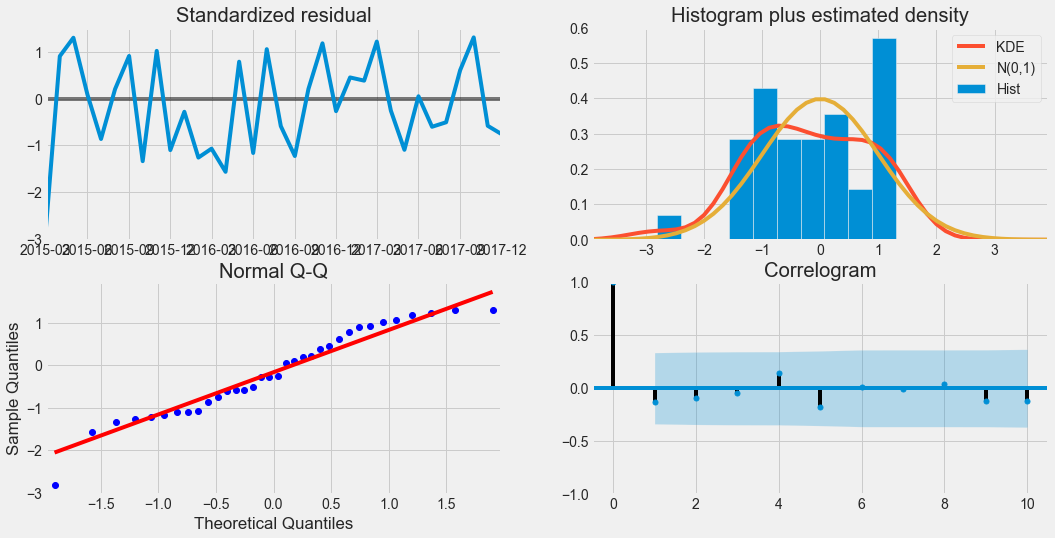

In [69]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Predicting Data

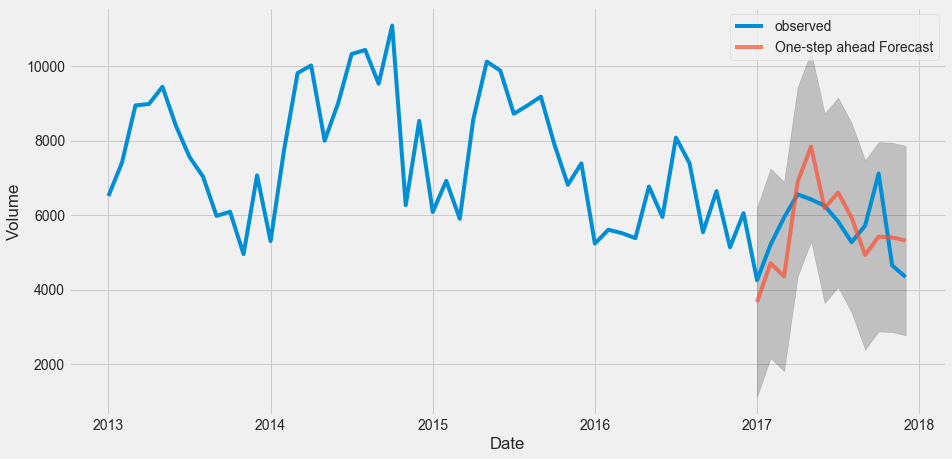

In [70]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = A['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Volume')
plt.legend()

plt.show()

In [71]:
A_forecasted = pred.predicted_mean
A_truth = A['2017-01-01':]

mse = ((A_forecasted - A_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 941228.33


In [72]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 970.17


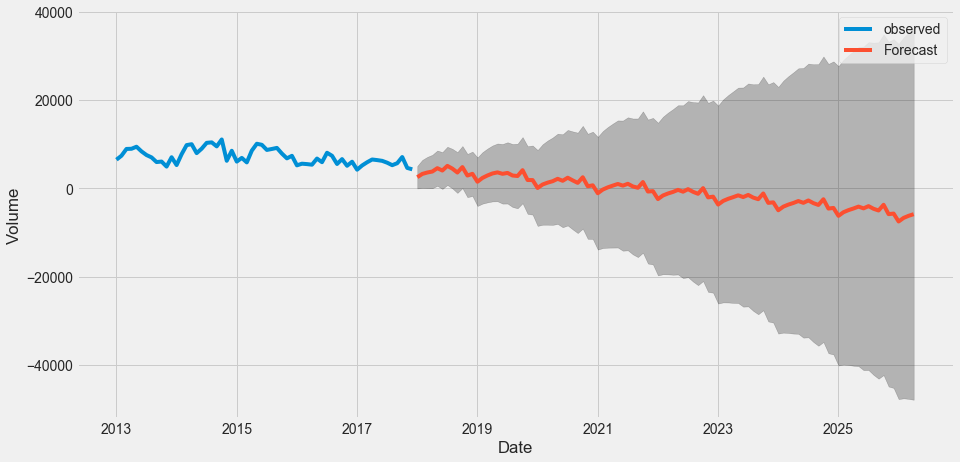

In [73]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = A.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Volume')

plt.legend()
plt.show()

# SKU01 vs 02 vs 03

In [74]:
# Agency 02

SKU01 = try3.loc[(try3['Agency'] == 'Agency_02') & (try3['SKU'] == 'SKU_01')]
SKU02 = try3.loc[(try3['Agency'] == 'Agency_02') & (try3['SKU'] == 'SKU_02')]
SKU03 = try3.loc[(try3['Agency'] == 'Agency_02') & (try3['SKU'] == 'SKU_03')]
SKU01.shape, SKU02.shape, SKU03.shape

((60, 23), (60, 23), (60, 23))

In [75]:
cols = ['Agency','SKU','Soda_Volume','Price','Sales','Promotions','Avg_Max_Temp','Industry_Volume','Easter Day','Good Friday','New Year','Christmas','Labor Day','Independence Day','Revolution Day Memorial','Regional Games ',
                    'FIFA U-17 World Cup','Football Gold Cup','Beer Capital','Music Fest','Avg_Population_2017','Avg_Yearly_Household_Income_2017']

SKU01.drop(cols, axis=1, inplace=True)
SKU02.drop(cols, axis=1, inplace=True)
SKU03.drop(cols, axis=1, inplace=True)

SKU01 = SKU01.sort_values('YearMonth')
SKU02 = SKU02.sort_values('YearMonth')
SKU03 = SKU03.sort_values('YearMonth')
        
SKU01 = SKU01.groupby('YearMonth')['Volume'].sum().reset_index()
SKU02 = SKU02.groupby('YearMonth')['Volume'].sum().reset_index()
SKU03 = SKU03.groupby('YearMonth')['Volume'].sum().reset_index()

SKU01 = SKU01.set_index('YearMonth')
SKU02 = SKU02.set_index('YearMonth')
SKU03 = SKU03.set_index('YearMonth')

y_SKU01 = SKU01['Volume'].resample('MS').mean()
y_SKU02 = SKU02['Volume'].resample('MS').mean()
y_SKU03 = SKU03['Volume'].resample('MS').mean()

SKU01 = pd.DataFrame({'YearMonth':y_SKU01.index, 'Volume':y_SKU01.values})
SKU02 = pd.DataFrame({'YearMonth': y_SKU02.index, 'Volume': y_SKU02.values})
SKU03 = pd.DataFrame({'YearMonth': y_SKU03.index, 'Volume': y_SKU03.values})

compare = SKU01.merge(SKU02, how='inner', on='YearMonth')
compare = compare.merge(SKU03, how='inner', on='YearMonth')
#compare.rename(columns={'Volume_x': 'SKU01', 'Volume_y': 'SKU02', 'Volume': 'SKU03'}, inplace=True)
compare.head()

,YearMonth,Volume_x,Volume_y,Volume
0,2013-01-01,6512.940,8422.164,7332.028
1,2013-02-01,7408.476,9546.442,8306.198
2,2013-03-01,8948.235,11509.560,9720.712
3,2013-04-01,8987.115,11712.817,10325.513
4,2013-05-01,9450.105,13031.497,12091.200


In [76]:
compare.rename(columns={'Volume_x': 'SKU01', 'Volume_y': 'SKU02', 'Volume': 'SKU03'}, inplace=True)

In [77]:
compare.head()

,YearMonth,SKU01,SKU02,SKU03
0,2013-01-01,6512.940,8422.164,7332.028
1,2013-02-01,7408.476,9546.442,8306.198
2,2013-03-01,8948.235,11509.560,9720.712
3,2013-04-01,8987.115,11712.817,10325.513
4,2013-05-01,9450.105,13031.497,12091.200


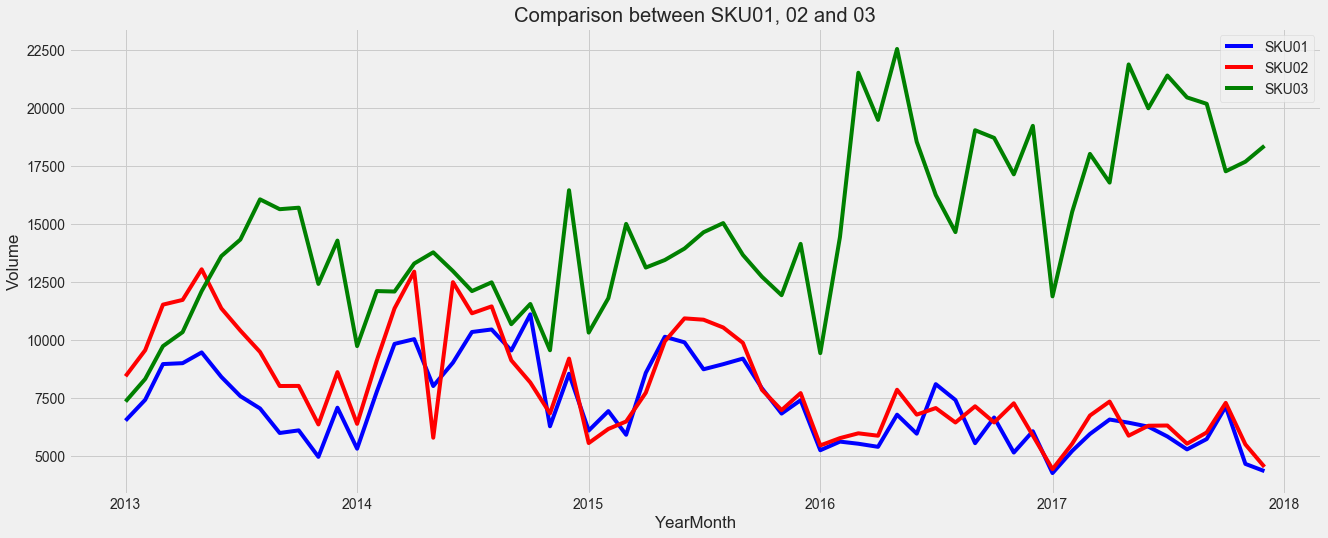

In [78]:
plt.figure(figsize=(20, 8))
plt.plot(compare['YearMonth'], compare['SKU01'], 'b-', label = 'SKU01')
plt.plot(compare['YearMonth'], compare['SKU02'], 'r-', label = 'SKU02')
plt.plot(compare['YearMonth'], compare['SKU03'], 'g-', label = 'SKU03')
plt.xlabel('YearMonth'); plt.ylabel('Volume'); plt.title('Comparison between SKU01, 02 and 03')
plt.legend();

# Time Series Modelling with Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

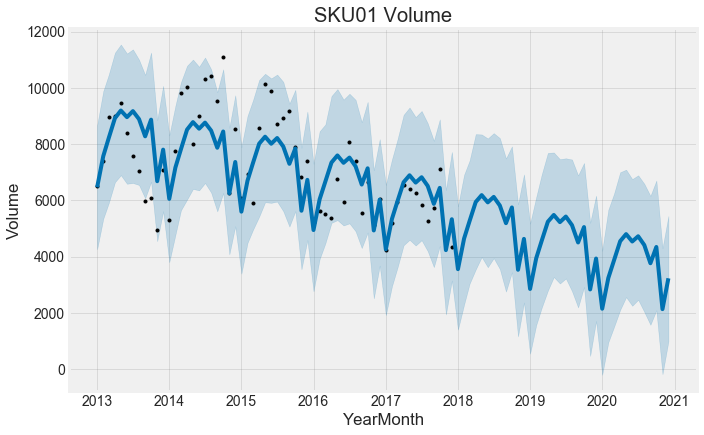

In [79]:
from fbprophet import Prophet

SKU01 = SKU01.rename(columns={'YearMonth': 'ds', 'Volume': 'y'})
SKU01_model = Prophet(interval_width=0.95)
SKU01_model.fit(SKU01)

SKU02 = SKU02.rename(columns={'YearMonth': 'ds', 'Volume': 'y'})
SKU02_model = Prophet(interval_width=0.95)
SKU02_model.fit(SKU02)

SKU03 = SKU03.rename(columns={'YearMonth': 'ds', 'Volume': 'y'})
SKU03_model = Prophet(interval_width=0.95)
SKU03_model.fit(SKU03)


SKU01_forecast = SKU01_model.make_future_dataframe(periods=36, freq='MS')
SKU01_forecast = SKU01_model.predict(SKU01_forecast)

SKU02_forecast = SKU02_model.make_future_dataframe(periods=36, freq='MS')
SKU02_forecast = SKU02_model.predict(SKU02_forecast)

SKU03_forecast = SKU03_model.make_future_dataframe(periods=36, freq='MS')
SKU03_forecast = SKU03_model.predict(SKU03_forecast)

plt.figure(figsize=(18, 6))
SKU01_model.plot(SKU01_forecast, xlabel = 'YearMonth', ylabel = 'Volume')
plt.title('SKU01 Volume');

<Figure size 1296x432 with 0 Axes>

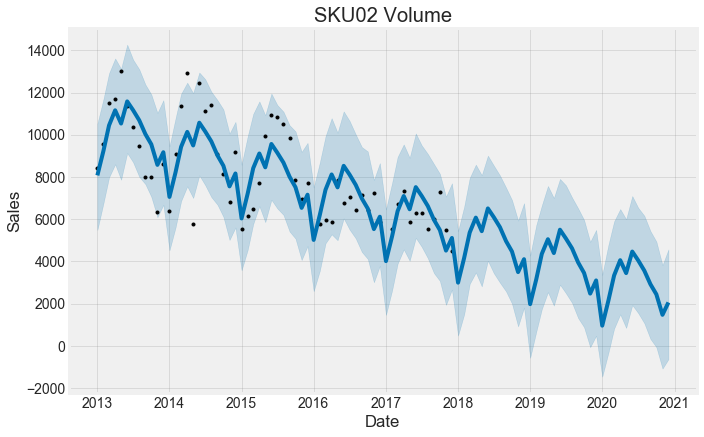

In [27]:
plt.figure(figsize=(18, 6))
SKU02_model.plot(SKU02_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('SKU02 Volume');

<Figure size 1296x432 with 0 Axes>

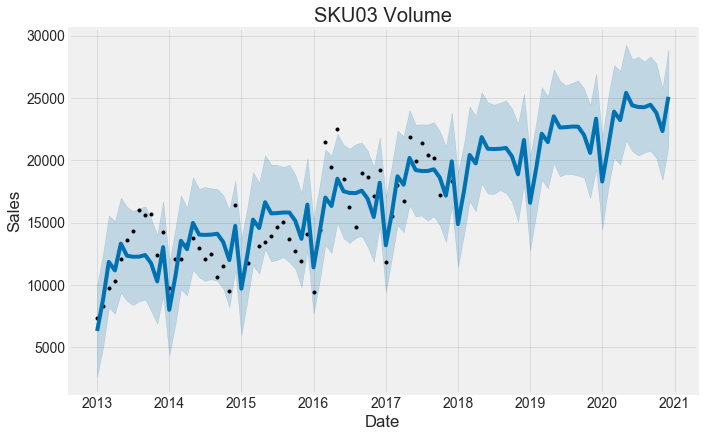

In [80]:
plt.figure(figsize=(18, 6))
SKU03_model.plot(SKU03_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('SKU03 Volume');

In [29]:
SKU01_names = ['SKU01_%s' % column for column in SKU01_forecast.columns]
SKU02_names = ['SKU02_%s' % column for column in SKU02_forecast.columns]

merge_SKU01_forecast = SKU01_forecast.copy()
merge_SKU02_forecast = SKU02_forecast.copy()

merge_SKU01_forecast.columns = SKU01_names
merge_SKU02_forecast.columns = SKU02_names

forecast = pd.merge(merge_SKU01_forecast, merge_SKU02_forecast, how = 'inner', left_on = 'SKU01_ds', right_on = 'SKU02_ds')

#forecast = forecast.rename(columns={'furniture_ds': 'YearMonth'}).drop('office_ds', axis=1)
forecast.head()

,SKU01_ds,SKU01_trend,SKU01_yhat_lower,SKU01_yhat_upper,SKU01_trend_lower,SKU01_trend_upper,SKU01_additive_terms,SKU01_additive_terms_lower,SKU01_additive_terms_upper,SKU01_yearly,...,SKU02_additive_terms,SKU02_additive_terms_lower,SKU02_additive_terms_upper,SKU02_yearly,SKU02_yearly_lower,SKU02_yearly_upper,SKU02_multiplicative_terms,SKU02_multiplicative_terms_lower,SKU02_multiplicative_terms_upper,SKU02_yhat
0,2013-01-01,8441.211,4301.904,8816.409,8441.211,8441.211,-1975.926,-1975.926,-1975.926,-1975.926,...,-2407.137,-2407.137,-2407.137,-2407.137,-2407.137,-2407.137,0.000,0.000,0.000,8078.100
1,2013-02-01,8406.870,5319.020,9869.750,8406.870,8406.870,-832.941,-832.941,-832.941,-832.941,...,-1146.555,-1146.555,-1146.555,-1146.555,-1146.555,-1146.555,0.000,0.000,0.000,9252.511
2,2013-03-01,8375.853,5995.544,10540.193,8375.853,8375.853,-151.839,-151.839,-151.839,-151.839,...,124.835,124.835,124.835,124.835,124.835,124.835,0.000,0.000,0.000,10446.069
3,2013-04-01,8341.512,6728.774,11161.001,8341.512,8341.512,582.541,582.541,582.541,582.541,...,926.407,926.407,926.407,926.407,926.407,926.407,0.000,0.000,0.000,11161.466
4,2013-05-01,8308.280,6865.634,11524.471,8308.280,8308.280,887.749,887.749,887.749,887.749,...,382.688,382.688,382.688,382.688,382.688,382.688,0.000,0.000,0.000,10534.353


In [30]:
SKU03_names = ['SKU03_%s' % column for column in SKU03_forecast.columns]

merge_SKU03_forecast = SKU03_forecast.copy()

merge_SKU03_forecast.columns = SKU03_names


forecast2 = pd.merge(forecast, merge_SKU03_forecast, how = 'inner', left_on = 'SKU01_ds', right_on = 'SKU03_ds')
forecast2.head()

,SKU01_ds,SKU01_trend,SKU01_yhat_lower,SKU01_yhat_upper,SKU01_trend_lower,SKU01_trend_upper,SKU01_additive_terms,SKU01_additive_terms_lower,SKU01_additive_terms_upper,SKU01_yearly,...,SKU03_additive_terms,SKU03_additive_terms_lower,SKU03_additive_terms_upper,SKU03_yearly,SKU03_yearly_lower,SKU03_yearly_upper,SKU03_multiplicative_terms,SKU03_multiplicative_terms_lower,SKU03_multiplicative_terms_upper,SKU03_yhat
0,2013-01-01,8441.211,4301.904,8816.409,8441.211,8441.211,-1975.926,-1975.926,-1975.926,-1975.926,...,-4265.361,-4265.361,-4265.361,-4265.361,-4265.361,-4265.361,0.000,0.000,0.000,6307.134
1,2013-02-01,8406.870,5319.020,9869.750,8406.870,8406.870,-832.941,-832.941,-832.941,-832.941,...,-1787.724,-1787.724,-1787.724,-1787.724,-1787.724,-1787.724,0.000,0.000,0.000,8930.474
2,2013-03-01,8375.853,5995.544,10540.193,8375.853,8375.853,-151.839,-151.839,-151.839,-151.839,...,998.583,998.583,998.583,998.583,998.583,998.583,0.000,0.000,0.000,11848.384
3,2013-04-01,8341.512,6728.774,11161.001,8341.512,8341.512,582.541,582.541,582.541,582.541,...,173.324,173.324,173.324,173.324,173.324,173.324,0.000,0.000,0.000,11168.827
4,2013-05-01,8308.280,6865.634,11524.471,8308.280,8308.280,887.749,887.749,887.749,887.749,...,2180.949,2180.949,2180.949,2180.949,2180.949,2180.949,0.000,0.000,0.000,13317.455


In [31]:
forecast2 = forecast2.rename(columns={'SKU01_ds': 'YearMonth'}).drop('SKU02_ds', axis=1)

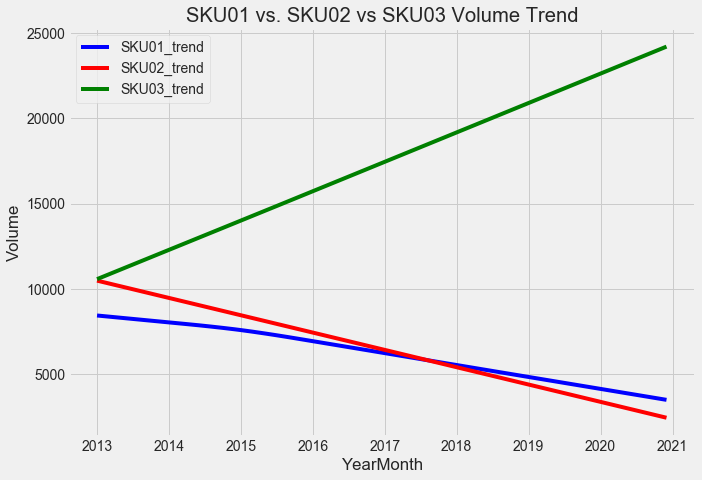

In [32]:
plt.figure(figsize=(10, 7))
plt.plot(forecast2['YearMonth'], forecast2['SKU01_trend'], 'b-')
plt.plot(forecast2['YearMonth'], forecast2['SKU02_trend'], 'r-')
plt.plot(forecast2['YearMonth'], forecast2['SKU03_trend'], 'g-')
plt.legend(); plt.xlabel('YearMonth'); plt.ylabel('Volume')
plt.title('SKU01 vs. SKU02 vs SKU03 Volume Trend');

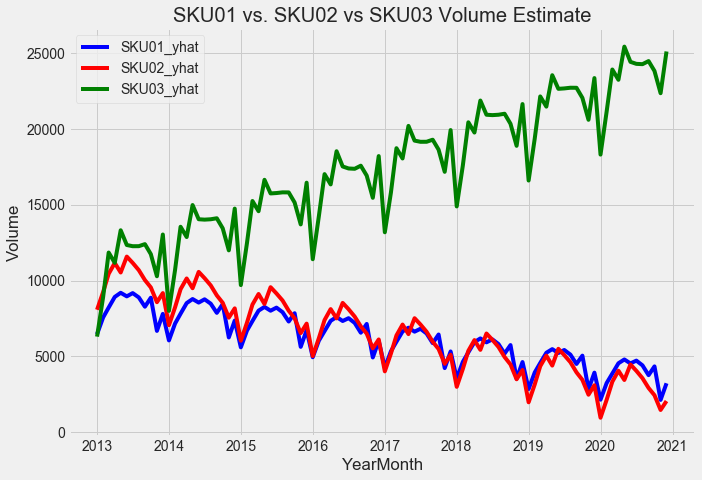

In [33]:
plt.figure(figsize=(10, 7))
plt.plot(forecast2['YearMonth'], forecast2['SKU01_yhat'], 'b-')
plt.plot(forecast2['YearMonth'], forecast2['SKU02_yhat'], 'r-')
plt.plot(forecast2['YearMonth'], forecast2['SKU03_yhat'], 'g-')
plt.legend(); plt.xlabel('YearMonth'); plt.ylabel('Volume')
plt.title('SKU01 vs. SKU02 vs SKU03 Volume Estimate');

# Trends and Patterns

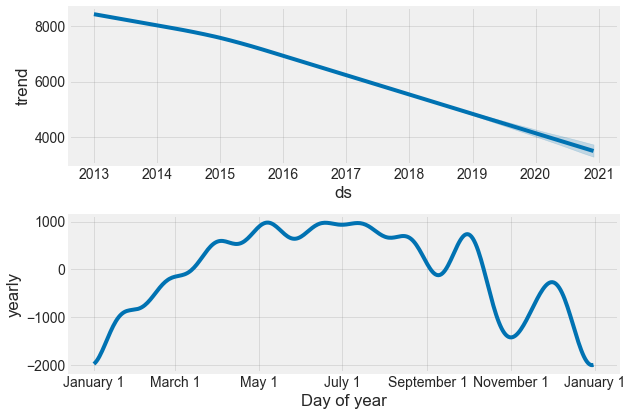

In [34]:
SKU01_model.plot_components(SKU01_forecast);

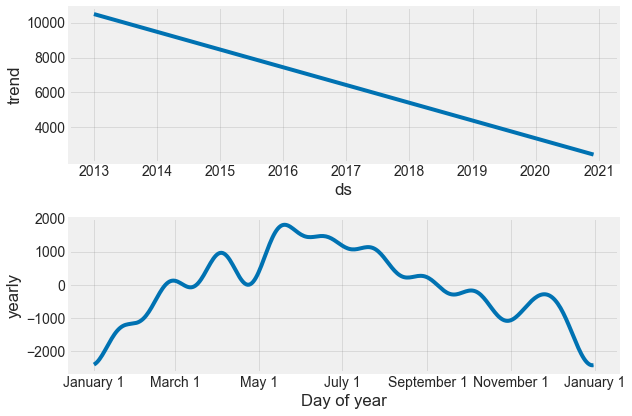

In [35]:
SKU02_model.plot_components(SKU02_forecast);

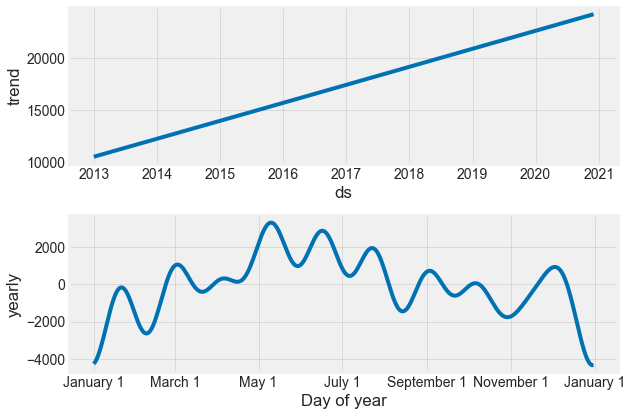

In [36]:
SKU03_model.plot_components(SKU03_forecast);